# Lemke-Howson: Uniformly random game

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon.game_theory as gt
from quantecon import tic, tac, toc

In [3]:
# matplotlib settings
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

Warm-up:

In [4]:
n = 3
g = gt.random_game((n, n))
NE, res = gt.lemke_howson(g, full_output=True)
res

        NE: (array([0., 1., 0.]), array([0., 0., 1.]))
 converged: True
      init: 0
  max_iter: 1000000
  num_iter: 3

In [5]:
seed = 0
ns = [10*i for i in range(1, 11)]
num_reps = 1000  # for each value of n
cappings = [None, 10]

random_state = np.random.RandomState(seed)
times = np.empty((len(cappings), len(ns), num_reps))
nums_iter = np.empty((len(cappings), len(ns), num_reps), dtype=int)
converged = np.empty((len(cappings), len(ns), num_reps), dtype=bool)

for i, n in enumerate(ns):
    for j in range(num_reps):
        g = gt.random_game((n, n), random_state=random_state)
        for k, capping in enumerate(cappings):
            tic()
            NE, res = gt.lemke_howson(g, capping=capping, full_output=True)
            times[k, i, j] = tac(verbose=False)
            nums_iter[k, i, j] = res.num_iter
            converged[k, i, j] = res.converged
    msg = '.' if converged[:, i, :].all() else 'F'
    print(msg, end='')

..........

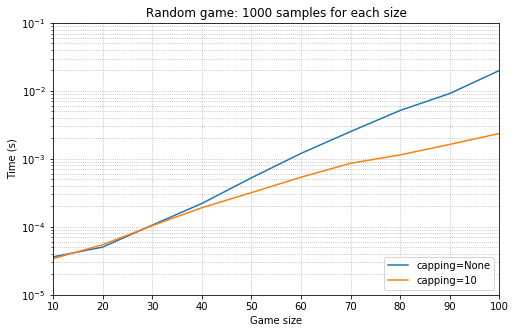

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
for k, capping in enumerate(cappings):
    ax.plot(ns, times[k].mean(axis=1), label='capping={}'.format(capping))
ax.set_xticks(ns)
ax.set_yscale('log')
ax.grid(linestyle=':', which='both')
ax.set_xlabel('Game size')
ax.set_ylabel('Time (s)')
ax.set_title(
    'Random game: {0} samples for each size'.format(num_reps)
)
plt.legend(loc='lower right')
plt.show()

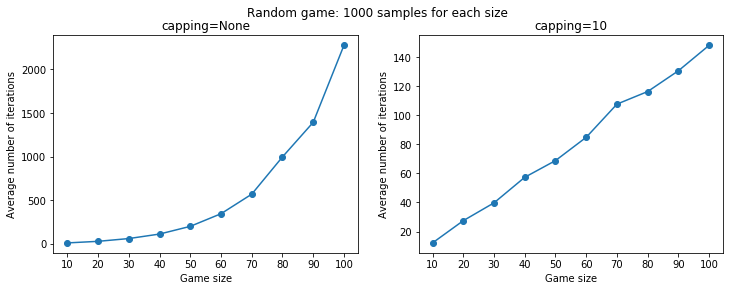

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for k, (ax, capping) in enumerate(zip(axes, cappings)):
    ax.margins(0.05)
    ax.plot(ns, nums_iter[k].mean(axis=1), 'o-')
    ax.set_xticks(ns)
    ax.set_xlabel('Game size')
    ax.set_ylabel('Average number of iterations')
    ax.set_title('capping={}'.format(capping))

fig.suptitle('Random game: {0} samples for each size'.format(num_reps))
plt.show()